# Duomenys

Didžiųjų pasaulio miestų oro temperatūros duomenys 1995-2020 metų laikotarpiu. Pateikiami kiekvienos dienos rodmenys. Miestai sugrupuoti pagal šalį ir regioną.

## Tikslas

Išanalizuoti pasirinktus duomenis su Python.

## Hipotezė

Pasaulyje vyksta globalinis atšilimas, nes pastaruosius dešimtmečius fiksuojamas temperatūros didėjimas.

# Duomenų paruošimas

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb

In [42]:
df = pd.read_csv('city_temperature.csv', low_memory=False)
df

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9
...,...,...,...,...,...,...,...,...
2906322,North America,US,Additional Territories,San Juan Puerto Rico,7,27,2013,82.4
2906323,North America,US,Additional Territories,San Juan Puerto Rico,7,28,2013,81.6
2906324,North America,US,Additional Territories,San Juan Puerto Rico,7,29,2013,84.2
2906325,North America,US,Additional Territories,San Juan Puerto Rico,7,30,2013,83.8


In [ ]:
# Iš viso įkelta daugiau negu 2,9 mln. eilučių ir 8 stulpeliai

In [43]:
to_celsius = (df.AvgTemperature - 32) * 5 / 9
df = df.assign(AvgTemp=np.round(to_celsius, 2)).drop(columns='AvgTemperature')

In [ ]:
# Duomenyse temperatūra yra F, todėl pakeičiama į C.

In [44]:
df

,Region,Country,State,City,Month,Day,Year,AvgTemp
0,Africa,Algeria,NaN,Algiers,1,1,1995,17.89
1,Africa,Algeria,NaN,Algiers,1,2,1995,9.67
2,Africa,Algeria,NaN,Algiers,1,3,1995,9.33
3,Africa,Algeria,NaN,Algiers,1,4,1995,8.00
4,Africa,Algeria,NaN,Algiers,1,5,1995,8.83
...,...,...,...,...,...,...,...,...
2906322,North America,US,Additional Territories,San Juan Puerto Rico,7,27,2013,28.00
2906323,North America,US,Additional Territories,San Juan Puerto Rico,7,28,2013,27.56
2906324,North America,US,Additional Territories,San Juan Puerto Rico,7,29,2013,29.00
2906325,North America,US,Additional Territories,San Juan Puerto Rico,7,30,2013,28.78


In [6]:
del df['State']

In [ ]:
# Ištrinamas nenaudojamas stulpelis "State"

In [7]:
df = df.drop_duplicates()
df.isnull().sum()

Region     0
Country    0
City       0
Month      0
Day        0
Year       0
AvgTemp    0
dtype: int64

In [ ]:
# Ištrinami dublikatai ir patikrinama ar nėra tuščių reikšmių

In [8]:
df.sort_values(['Year','Month','Day'])

,Region,Country,City,Month,Day,Year,AvgTemp
845909,Europe,Norway,Oslo,12,1,200,-72.78
845910,Europe,Norway,Oslo,12,2,200,-72.78
743367,Europe,Germany,Hamburg,12,3,200,-72.78
845911,Europe,Norway,Oslo,12,3,200,-72.78
743368,Europe,Germany,Hamburg,12,4,200,-72.78
...,...,...,...,...,...,...,...
2862479,North America,US,Green Bay,5,13,2020,3.61
2871744,North America,US,Madison,5,13,2020,7.61
2881009,North America,US,Milwaukee,5,13,2020,5.11
2890274,North America,US,Casper,5,13,2020,12.28


In [ ]:
## Dalis reikšmių netvarkingos: Year 200, 201 (klaidingai įvesti), o 2020 neįtraukti į analizę, nes duomenys tik iki 5 mėnesio

In [9]:
df = df[df['Year']<2020]

In [10]:
df = df[(df.Year!=200) & (df.Year!=201)]
df.head()

,Region,Country,City,Month,Day,Year,AvgTemp
0,Africa,Algeria,Algiers,1,1,1995,17.89
1,Africa,Algeria,Algiers,1,2,1995,9.67
2,Africa,Algeria,Algiers,1,3,1995,9.33
3,Africa,Algeria,Algiers,1,4,1995,8.00
4,Africa,Algeria,Algiers,1,5,1995,8.83


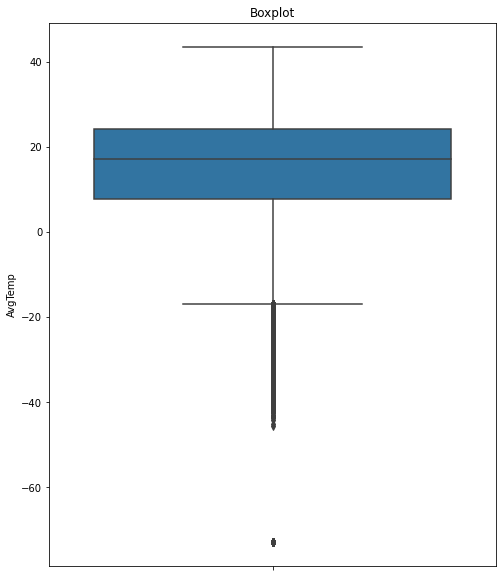

In [292]:
plt.figure(figsize = (8,10))
sb.boxplot(data = df,y = 'AvgTemp')
_=plt.title("Boxplot")

In [11]:
df = df[df['AvgTemp']>-60]

In [ ]:
## Pašalintos duomenis iškreipiančios reikšmės, kai temperatūra buvo mažiau už -60C

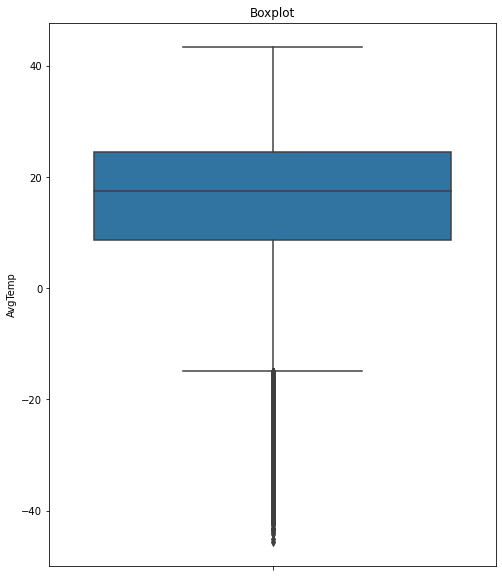

In [12]:
plt.figure(figsize = (8,10))
sb.boxplot(data = df,y = 'AvgTemp')
_=plt.title("Boxplot")

# Duomenų statistiniai rodikliai

In [13]:
df.sort_values(['Year','Month','Day'])

,Region,Country,City,Month,Day,Year,AvgTemp
0,Africa,Algeria,Algiers,1,1,1995,17.89
13809,Africa,Benin,Cotonou,1,1,1995,27.33
23075,Africa,Central African Republic,Bangui,1,1,1995,24.06
32341,Africa,Congo,Brazzaville,1,1,1995,26.61
41606,Africa,Egypt,Cairo,1,1,1995,15.11
...,...,...,...,...,...,...,...
2862345,North America,US,Green Bay,12,31,2019,-2.39
2871610,North America,US,Madison,12,31,2019,-3.67
2880875,North America,US,Milwaukee,12,31,2019,-2.22
2890140,North America,US,Casper,12,31,2019,-7.56


In [ ]:
# Po duomenų sutvarkimo liko apie 2,7 mln. eilučių ir 7 stulpeliai

In [46]:
df['AvgTemp'].describe()

count    2.906327e+06
mean     1.333601e+01
std      1.784673e+01
min     -7.278000e+01
25%      7.670000e+00
50%      1.694000e+01
75%      2.417000e+01
max      4.333000e+01
Name: AvgTemp, dtype: float64

In [15]:
df['AvgTemp'].mean()

15.82251602737838

In [ ]:
# Vidutinė temperatūra 1995-2019 m. buvo 15,8C, didžiausia 43,3C Kuveite, o mažiausia -45,6 Fairbankse

In [16]:
df.groupby('City')['AvgTemp'].max().sort_values(ascending=False).head(10)

City
Kuwait       43.33
Doha         42.50
Dhahran      42.11
Phoenix      42.06
Yuma         41.94
Dubai        41.94
Abu Dhabi    41.83
Las Vegas    41.67
Muscat       41.06
Riyadh       40.56
Name: AvgTemp, dtype: float64

In [17]:
df.groupby('City')['AvgTemp'].min().sort_values(ascending=True).head(10)

City
Fairbanks    -45.56
Ulan-bator   -38.44
Regina       -38.06
Winnipeg     -37.61
Duluth       -34.33
Fargo        -34.17
Edmonton     -34.00
Bismarck     -33.39
Calgary      -33.28
Helena       -32.44
Name: AvgTemp, dtype: float64

In [18]:
df.groupby(['Region'])['AvgTemp'].mean().sort_values(ascending=False)

Region
Africa                               23.550537
Middle East                          23.317657
South/Central America & Carribean    22.321482
Asia                                 20.111627
Australia/South Pacific              16.787684
North America                        13.466978
Europe                               11.139048
Name: AvgTemp, dtype: float64

In [ ]:
# Afrika - šilčiausias regionas, Europa - šalčiausias

# Duomenų lentelės

In [19]:
df.groupby(['Year'])['AvgTemp'].mean().sort_values(ascending=False)

Year
2016    16.693513
2017    16.527510
2015    16.489901
2012    16.336856
2018    16.261832
2019    16.184519
2006    16.132301
1998    16.041541
2011    15.985340
2007    15.979971
2010    15.934312
2005    15.856191
2001    15.744186
1999    15.743295
2002    15.702279
2014    15.662346
2009    15.623679
2004    15.615388
2013    15.605356
2003    15.567616
2008    15.515689
2000    15.398773
1995    15.240810
1997    15.079416
1996    14.826302
Name: AvgTemp, dtype: float64

In [ ]:
# Pastebima tendencija, kad didžiausia vidutinė metų temperatūra buvo 2012-2019 metais.

In [20]:
df.groupby(['Country','Region'])['AvgTemp'].max().sort_values(ascending=False).head(20)

Country               Region                           
Kuwait                Middle East                          43.33
Qatar                 Middle East                          42.50
Saudi Arabia          Middle East                          42.11
US                    North America                        42.06
United Arab Emirates  Middle East                          41.94
Oman                  Middle East                          41.06
India                 Asia                                 39.83
Mexico                North America                        39.67
Bahrain               Middle East                          39.61
Nigeria               Africa                               39.33
Cyprus                Europe                               39.17
Pakistan              Asia                                 39.11
Turkmenistan          Asia                                 39.00
Egypt                 Africa                               37.89
Guinea-Bissau         Africa      

In [ ]:
# Didžiausia 1995-2019 m. vidutinė temperatūra buvo vidurinių rytų šalyse: Kuveite, Katare, Saudo Arabijoje.
# Visos šalys "kaimynės"

In [21]:
pivoted_df=pd.pivot_table(df[['Region','AvgTemp','Year']], 
                          values='AvgTemp', index=['Region'],
                          columns=['Year'], aggfunc=np.mean)
pivoted_df

Year,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Region,,,,,,,,,,,,,,,,,,,,,
Africa,23.272240,23.085922,23.022888,23.193781,23.274549,23.009901,23.498142,23.493816,23.768635,23.688573,...,24.072513,23.542744,23.129732,23.516754,23.720283,23.816039,24.046288,23.858320,23.711235,23.940358
Asia,19.590559,19.927560,20.193551,20.590543,20.016232,19.843766,19.854072,20.032955,19.951247,20.174710,...,20.457896,19.806022,19.576998,19.910425,19.892380,20.370648,20.474881,20.254278,20.252916,20.370677
Australia/South Pacific,16.221983,16.087297,16.431717,16.684082,16.719492,16.587854,16.568621,16.762338,16.597290,16.586990,...,16.835720,16.741046,16.521644,17.162062,17.138269,16.951575,17.215396,17.203522,17.120420,17.402023
Europe,10.855549,10.076932,10.800106,11.037081,11.250531,11.678491,11.101016,11.395378,11.226278,10.994910,...,10.325080,11.301206,10.800724,10.674809,11.536173,11.453094,11.116309,11.139760,11.591819,11.611442
Middle East,22.007074,22.498672,21.711888,23.170260,23.170944,22.496956,23.419793,23.131053,23.152327,23.038908,...,24.476860,23.142068,23.501125,23.508652,23.818613,24.147847,23.953964,23.901153,24.572732,23.851514
North America,13.087597,12.272870,12.626488,14.148422,13.635338,13.057759,13.493721,13.292857,13.101372,13.196701,...,13.450978,13.622621,14.478001,12.997363,12.878094,14.127389,14.594504,14.380774,13.877780,13.741266
South/Central America & Carribean,21.468210,21.665366,22.316165,22.303406,21.756443,21.848601,22.212365,22.560070,22.310888,22.189854,...,22.386135,22.307245,22.292278,22.496305,22.655705,23.274385,23.121594,23.009442,22.598388,22.887587


In [ ]:
# Sukuriama Pivot lentelė, kurioje pateikiami regionų vidutinės temperatūros duomenys kas metus 1995-2019 m. laikotarpiu.

# Grafikai

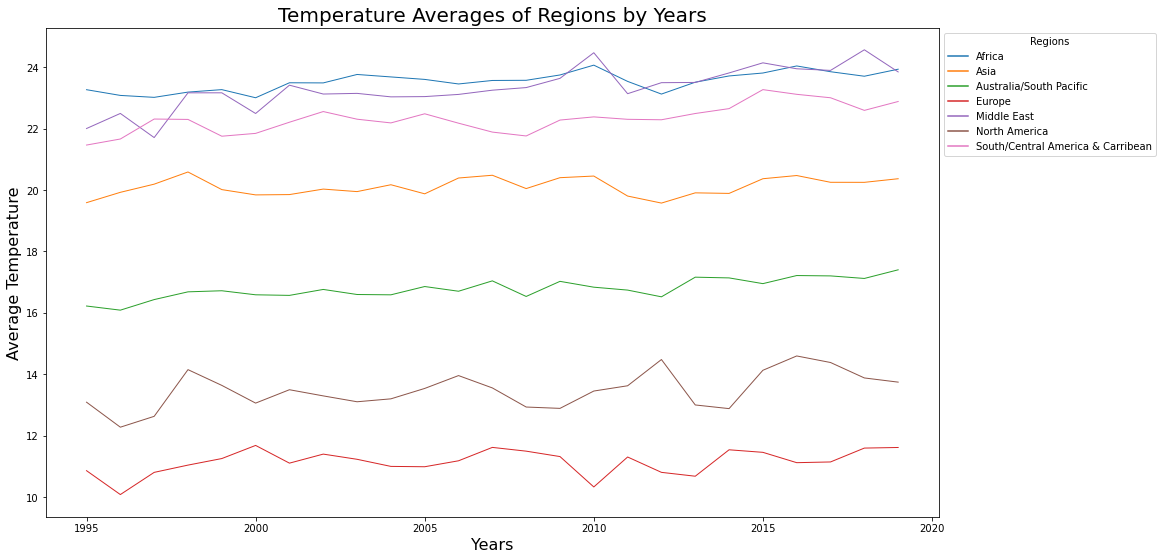

In [22]:
region = df[['Region', 'Year', 'AvgTemp']].groupby(['Region', 'Year']).mean()
plt.figure(figsize=(16, 9))
plt.title('Temperature Averages of Regions by Years',fontsize=20)
plt.xlabel('Years',fontsize=16)
plt.ylabel('Average Temperature',fontsize=16)
sb.lineplot(x = 'Year', y = 'AvgTemp', hue = 'Region', units = 'Region', markers = True, dashes = False, estimator = None, lw = 1, data = region)
plt.legend(bbox_to_anchor = (1, 1), title = 'Regions')
plt.show()

In [ ]:
# Pivot lentelės duomenys atvaizduoji grafiškai

In [ ]:
# Lyginant regionus tarpusavyje matoma, kad temperatūra nežymiai didėja visuose regionuose, 
# todėl negalima teigti, jog globalus atšilimas priklauso nuo konkretaus regiono.

# Toliau duomenys yra analizuojami bendrai - vidutinė visų regionų (miestų) temperatūra kas metus 1995-2019 m. laikotarpiu

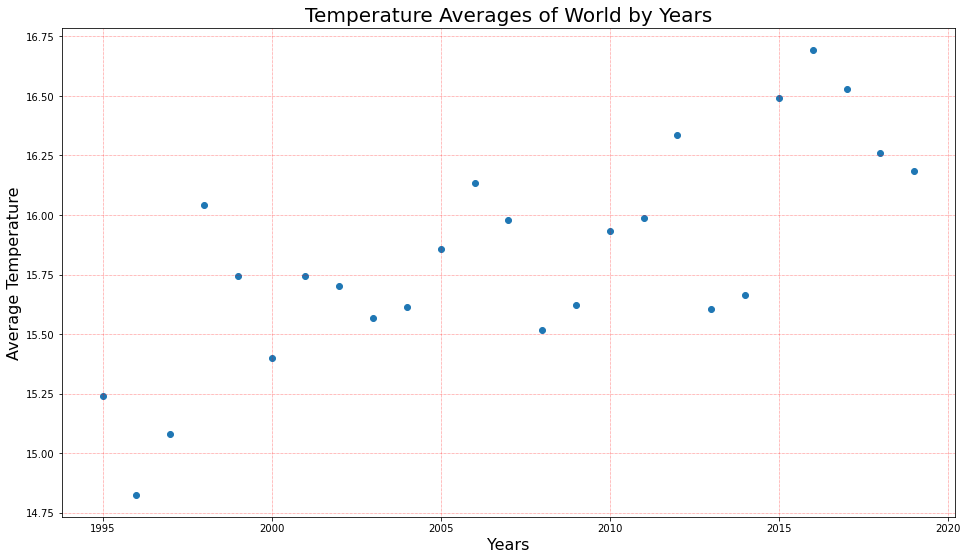

In [30]:
world_data = df
world_avg_deg = world_data.groupby("Year")["AvgTemp"].mean()

plt.figure(figsize=(16, 9))
plt.scatter(world_avg_deg.axes[0],world_avg_deg)
plt.xlabel('Years',fontsize=16)
plt.ylabel('Average Temperature',fontsize=16)
plt.title('Temperature Averages of World by Years',fontsize=20)
plt.grid(color='r', linestyle='dotted', linewidth=0.5)
plt.show()

In [ ]:
# Atvaizduojamos vidutinės kiekvienų metų reikšmės.

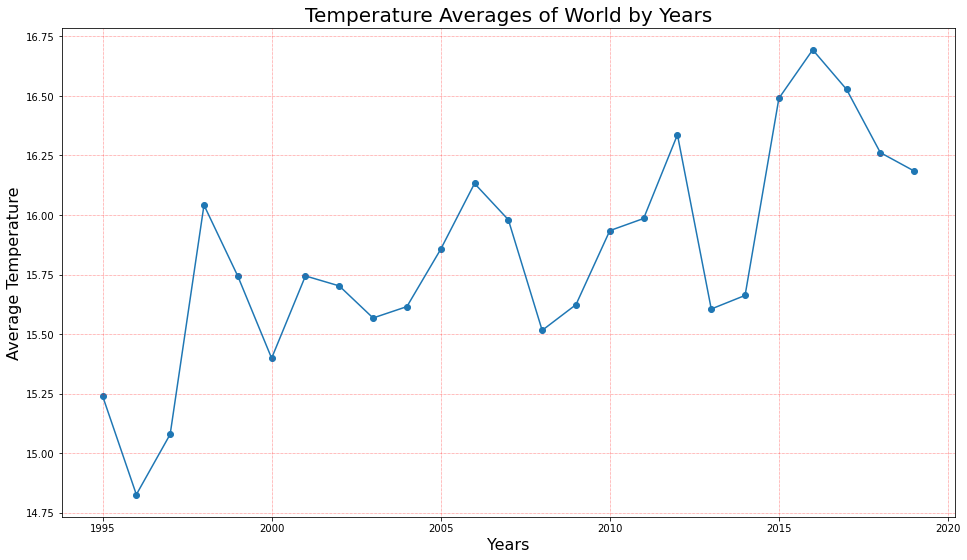

In [38]:
plt.figure(figsize=(16, 9))
plt.scatter(world_avg.axes[0],world_avg)
plt.plot(x,y,linestyle='solid',label="Temperature")
plt.xlabel('Years',fontsize=16)
plt.ylabel('Average Temperature',fontsize=16)
plt.title('Temperature Averages of World by Years',fontsize=20)
plt.grid(color='r', linestyle='dotted', linewidth=0.5)
plt.show()

In [ ]:
# Kiekvienų metų reikšmės sujungiamos linija dėl geresnio vizualaus įvertinimo. 
# Matoma, kad vidutinė temperatūra svyruoja, tačiau visu laikotarpiu pastebimas temperatūros kilimas, 
# todėl į grafiką papildomai pridedama polinominė regresija

In [35]:
x = world_avg.axes[0].values.reshape(-1,1)
y = world_avg.values.reshape(-1,1)
print(x.shape)
print(y.shape)

(25, 1)
(25, 1)


In [36]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
Poly_reg=PolynomialFeatures(degree=2) 
x_poly=Poly_reg.fit_transform(x)
Lin_reg = LinearRegression()
Lin_reg.fit(x_poly,y)

LinearRegression()

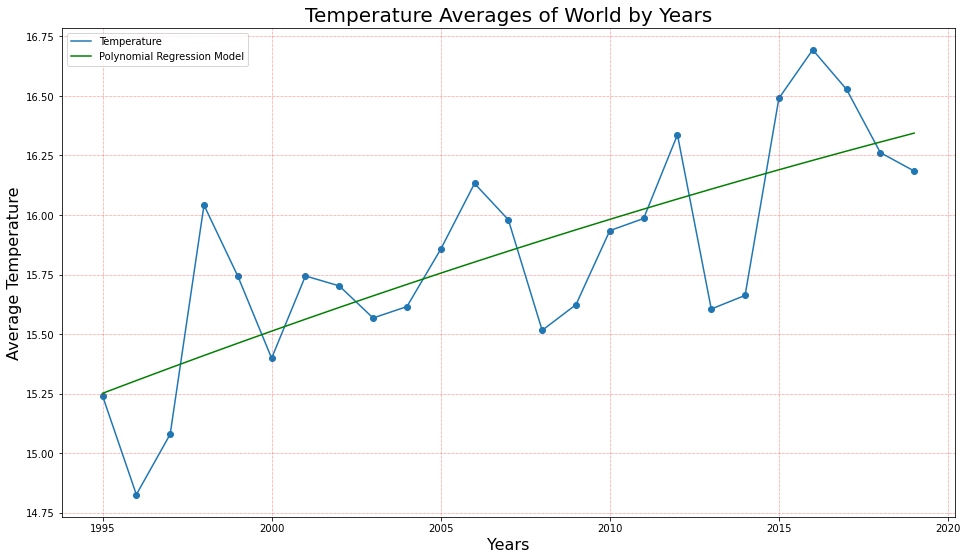

In [37]:
plt.figure(figsize=(16, 9))
plt.scatter(world_avg.axes[0],world_avg)
plt.plot(x,y,linestyle='solid',label="Temperature")
plt.xlabel('Years',fontsize=16)
plt.ylabel('Average Temperature',fontsize=16)
plt.title('Temperature Averages of World by Years',fontsize=20)
plt.grid(color='r', linestyle='dotted', linewidth=0.5)
y_pred=Lin_reg.predict(x_poly)
plt.plot(x,y_pred,color='green',label='Polynomial Regression Model')
plt.legend()
plt.show()

In [ ]:
# Diagramoje matomas pokytis: vidutinė pasaulio temperatūra nuo 1995 m. iki 2019 m. pakilo daugiau negu 1C
# Gavus polinominės regresijos kreivę, šiuo atveju buvo galima naudoti ir tiesinę regresiją.

# Išvados

- Iškelta hipotezė pasitvirtino - nuo 1995 m. iki 2019 m. pasaulyje vidutinė temperatūra pakilo daugiau negu 1C, kas rodo globalinį atšilimą;
- 2000, 2008 vidutinė temperatūra laikinai sumažėjo
- Rekordinė temperatūra fiksuota 2015-2019 metais
- Aukščiausia temperatūra (virš 40C) būna viduriniuose rytuose bei JAV.

Galimi tolimesni tyrimo tikslai: 
- Kuriuose miestuose / regionuose temperatūra išliko tokia pati arba sumažėjo; 
- Prognozuoti, kaip keisis temperatūra ateityje; 